# 팀 프로젝트명: 웹툰의 드라마 실사화와 실사화된 드라마의 흥행 조건 분석
- 팀원1(학과(부)/학번/성명): 자유전공학부/ 2021-19625 / 김수민
- 팀원2(학과(부)/학번/성명): 국어교육과/ 2018-19369 / 정성목
- 팀원3(학과(부)/학번/성명): 국어교육과/ 2019-10530 / 정수윤
- 팀원4(학과(부)/학번/성명): 자유전공학부 / 2020-12161 / 정채연


## 0. 프로젝트 요약(공백포함 500글자 이내)
- 목적/내용/결론

본 프로젝트에서는 드라마로 실사화된 웹툰들의 조건과 해당 드라마들의 흥행 조건에 대해 분석해봤다. 프로젝트는 크게 원작 웹툰에 대한 분석과 실사화된 드라마에 대한 분석으로 나눌 수 있다. 웹툰 분석에서는 실사화된 웹툰들의 별점 평균과 장르를 조사했다. 평균에서 크게 벗어난 웹툰들의 경우에는 왜 실사화되었을지 그 이유에 대해 고민해봤으며, 장르의 경우에는 왜 특정 장르의 웹툰들이 많이 실사화되는지 그 원인에 대해 분석해봤다. 드라마 분석에서는 실사화된 드라마들 중에서도 흥행작과 실패작을 구분하여 원작 웹툰의 별점과 해당 드라마의 방송사/플랫폼 분석을 통해 흥행의 원인에 대해 추론해봤다. 다만, 이 프로젝트는 네이버 웹툰들 중 드라마로 실사화된 웹툰들을 분석하였기 때문에, 드라마로 실사화된 웹툰의 모집단을 표본이 대표할 수 있을지에 대해서는 의구심이 들었다. 따라서 표본을 확장하여 다른 사이트에서 연재된 웹툰들의 데이터도 수집한다면 더욱 유의미한 결론을 얻을 수 있을 것이라고 생각했다.

## 1.전체코드

In [ ]:
# selenium 설치
!pip install selenium
!apt-get update

# chrom driver 구동
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

# 캡쳐시 폰트깨짐 해결
!apt-get install fonts-unfonts-core 

# chrom driver 옵션 설정
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=chrome_options)

# numpy, pandas 구동
import numpy as np
import pandas as pd

# matplotlib, seaborn 구동
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설치
!apt-get install fonts-nanum*
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm


font_name = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf').get_name()
#print(font_name)
sys_font=fm.findSystemFonts()
#print(sys_font) #시스템에 설치되어 있는 폰트들을 보여줌
rc('font',family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

# 시간 도입
import time

# 기타 웹크롤링
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

# 서론
# 통계청 '주이용 콘텐츠 이용정도' 데이터 활용

이용정도 = ['전혀 이용하지 않는다', '거의 이용하지 않는다', '별로 이용하지 않는다', '보통', '어느 정도 이용한다', '자주 이용한다', '매우 자주 이용한다']
응답자특성 = ['유아동', '청소년', '성인', '60대', '남성', '여성']
유아동 = [21.5, 10.3, 11.1, 21.8, 19.8,	10.2, 5.3]
청소년 = [5.6, 10.3, 5.3, 19.8, 27.4, 16.2, 5.3]
성인 = [9.1, 13.0, 15.7, 19.7, 23.5, 14.7, 4.3]
육십대 = [26.3, 15.0, 15.3, 14.2, 16.4, 11.1, 1.7]
남성 = [9.3, 12.5, 15.2, 19.9, 23.7, 14.9, 4.6]
여성 = [10.8, 12.9, 16.0, 18.9, 23.3, 14.1, 4.0]
비율 = [유아동, 청소년, 성인, 육십대, 남성, 여성]
d1 = pd.DataFrame(비율, index=응답자특성, columns=이용정도)

d1['이용X'] = d1.loc[:, '전혀 이용하지 않는다':'별로 이용하지 않는다'].sum(axis=1)
d1['이용O'] = d1.loc[:, '어느 정도 이용한다':'매우 자주 이용한다'].sum(axis=1)

d2 = d1[['이용X', '보통', '이용O']]

d2.plot(kind='barh', stacked = True, figsize=(10,2))
plt.title('주이용 콘텐츠 이용정도')
plt.show()

# 본론
## 실사화된 웹툰 분석

# 웹툰 리스트 정의
웹툰_리스트 = ['간 떨어지는 동거', '계룡선녀전', '한번 더 해요', '꽃가족', '내 ID는 강남미인', '내과 박원장', '냄새를 보는 소녀', '놓지마 정신줄', '닥터 프로스트', '멜로홀릭', '사장님을 잠금해제', '송곳', '싸우자 귀신아', '쌉니다 천리마마트', '아일랜드', '알고있지만', '약한 영웅', '어서와', '오렌지 마말레이드', '운빨로맨스', '은주의 방', '녹두전', '조선왕조실톡', '참치와 돌고래', '청춘 블라썸', '치즈인더트랩', '커넥트', '타인은 지옥이다', '가우스전자', '금수저', '내일', '동네변호사 조들호', '머니게임', '스위트홈', '안나라수마나라', '여신강림', '우월한 하루', '유미의 세포들', '지금 우리 학교는', '지옥', 'D.P 개의날', '마음의 소리', '만찢남녀', '무한동력', '백수세끼', '소녀의 세계', '손의 흔적', '썸남', '연애세포', '연애혁명', '오늘도 형제는 평화롭다', '우리 헤어졌어요', '질풍기획', '후유증', '고래별', '낮에 뜨는 달', '닭강정', '마음의 숙제', '방과 후 전쟁활동', '비질란테', '사냥개들', '살인자o난감', '언터쳐블', '오늘도 사랑스럽개', '우연일까', '운수오진날', '이두나!', '이제 곧 죽습니다', '정년이', '하이브', '마스크걸', '이번 생도 잘 부탁해']
웹툰_리스트.sort()
print(웹툰_리스트)

webtoon1 = pd.DataFrame(index=웹툰_리스트)

### 웹툰 별점 분석
웹툰별점_리스트 = []

import re
pattern = re.compile('[0-9]\.[0-9][0-9]')
rate = 'ddd'
print(pattern.match(rate))

def webtoon_rating(name):
    driver.get('https://comic.naver.com/')
    driver.find_element(By.CLASS_NAME, 'snb_search_text').send_keys(name)
    time.sleep(3)    
    
    xpath = '//*[@id="search_bar_button"]/span'
    driver.find_element(By.XPATH, value=xpath).click()
    time.sleep(3)  
    
    if (driver.find_element(By.CLASS_NAME, "resultList").text) != '검색 결과가 없습니다.':
        xpath = '//*[@id="content"]/div[2]/ul/li[1]/h5/a'
        driver.find_element(By.XPATH, value=xpath).click()
        time.sleep(3)
        html=driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        strong_list = soup.find_all('strong', {"class": ""})
        
        rate_list = []
        
        for strong in strong_list:
            if pattern.match(strong.text.strip()) != None:
                rate_list.append(strong.text.strip())
            
        
        for i in range(len(rate_list)):
            rate_list[i] = float(rate_list[i])
        
        mean = sum(rate_list) / len(rate_list)
        
        return mean

for i in 웹툰_리스트:
    웹툰별점_리스트.append(webtoon_rating(i))
    
print(웹툰별점_리스트)

webtoon1['별점'] = pd.Series(웹툰별점_리스트, index=웹툰_리스트)

### 시각화
sns.boxplot (x='별점', data=webtoon1)
plt.title('드라마로 만들어진 웹툰의 별점 boxplot')
plt.show()

별점평균 = webtoon1.mean()
print(f'별점 평균 : {별점평균}')

### 웹툰 장르 분석
웹툰장르_리스트 = []
def webtoon_genre(name):
    global 웹툰장르_리스트
    driver.get('https://comic.naver.com/')
    driver.find_element(By.CLASS_NAME, 'snb_search_text').send_keys(name) 
    time.sleep(3)    
    xpath = '//*[@id="search_bar_button"]/span' # 검색 클릭
    driver.find_element(By.XPATH, value=xpath).click()
    time.sleep(3)  
    if (driver.find_element(By.CLASS_NAME, "resultList").text) != '검색 결과가 없습니다.':
        xpath = '//*[@id="content"]/div[2]/ul/li[1]/h5/a' 
        driver.find_element(By.XPATH, value=xpath).click()
        time.sleep(3)  
        웹툰장르 = driver.find_elements(By.CLASS_NAME, "genre") 
        if len(웹툰장르) != 0:
            for i in range(len(웹툰장르)):
                gen_text= 웹툰장르[i].text
                웹툰장르_리스트.append(gen_text) 
    else:
        웹툰장르_리스트.append('None')

for i in 웹툰_리스트:
    webtoon_genre(i)
print(웹툰장르_리스트) 

genre = []
for a in 웹툰장르_리스트:
    a = a.split(', ')
    for b in a:
        genre.append(b)
print(genre)

def pop_vote(data):
    result = dict()
    for each_data in data:
        if (each_data in result) == True:
            result[each_data] = result[each_data] +1
        else:
            result[each_data] = 1
    return result

dic_genre = pop_vote(genre)
print(dic_genre)

### 형식 차원
print('스토리:', dic_genre['스토리'])
print('에피소드:', dic_genre['에피소드'])
print('옴니버스:', dic_genre['옴니버스'])
print()

### 내용 차원
print('로맨스:', dic_genre['로맨스'])
print('드라마', dic_genre['드라마'])
print('개그:', dic_genre['개그'])
print('감성:', dic_genre['감성'])
print('스릴러:', dic_genre['스릴러'])
print('액션:', dic_genre['액션'])
print('판타지:', dic_genre['판타지'])
print('일상:', dic_genre['일상'])

### 형식 차원의 구분 코드
form_num = [59,9,4]
form_genre = ['스토리', '에피소드', '옴니버스']
form_column= ['웹툰의 수']
form=pd.DataFrame(form_num, index=form_genre, columns= form_column)

sorted_form=form.sort_values(by='웹툰의 수')
sorted_form

### 줄거리의 내용 구분
story_num = [20,23,10,1,13,3,1,1]
story_genre = ['로맨스','드라마','개그','감성','스릴러','액션','판타지','일상']
story_column= ['웹툰의 수']
story=pd.DataFrame(story_num, index=story_genre, columns= story_column)

sorted_story=story.sort_values(by='웹툰의 수')
sorted_story

## 시각화
sorted_form.plot(kind='barh', stacked = True) 
plt.title('드라마 실사화 웹툰의 장르 구분 (형식 차원)')
plt.show()

sorted_story.plot(kind='barh')
plt.title('드라마 실사화 웹툰의 장르 구분 (내용 차원)')
plt.show()

## 실사화된 드라마 분석
드라마_리스트 = ['간 떨어지는 동거', '계룡선녀전', '고백부부', '꽃가족', '내 아이디는 강남미인', '내과 박원장', '냄새를 보는 소녀', '놓지마 정신줄', '닥터 프로스트', '멜로홀릭', '사장님을 잠금해제', '송곳', '싸우자 귀신아', '쌉니다 천리마마트', '아일랜드', '알고있지만', '약한영웅 Class 1', '어서와', '오렌지 마말레이드', '운빨로맨스', '은주의 방', '녹두전', '조선왕조실톡', '참치와 돌고래', '청춘 블라썸', '치즈인더트랩', '커넥트', '타인은 지옥이다', '가우스전자', '금수저', '내일', '동네변호사 조들호 1', '머니게임', '스위트홈', '안나라수마나라', '여신강림', '우월한 하루', '유미의 세포들 1', '지금 우리 학교는', '지옥', 'D.P.']
드라마_리스트.sort()

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

url = "http://naver.com" 
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)

시청률_리스트={}
방송사_리스트={}
기준=['시청률']

### 시청률 분석
for each in 드라마_리스트:
    driver.get(url)
    elem_search = driver.find_element(By.ID, 'query')
    elem_search.send_keys(each, '드라마')
    xpath = '//*[@id="search_btn"]' #검색버튼 xpath
    driver.find_element(By.XPATH, value=xpath).click()
    driver.implicitly_wait(3)
    html=driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    b=soup.find_all('em', class_="value")
    for i in range(len(b)):
        c=b[i].get_text()
        if c==None:
            시청률_리스트[each]=np.NaN
        else:
            c = c[:-1]
            c = float(c) 
            시청률_리스트[each]=c

df1=pd.DataFrame(시청률_리스트, index=기준)
df1=df1.T

## 방송사 분석
방송사_리스트 = ['tvN', 'tvN', 'KBS2', 'MBC', 'JTBC', 'tvN', 'MBC', 'SBS', 'KBS2', 'OCN', 'KBS2', 'tvN', 'OCN', 'ENA', 'JTBC', 'tvN', 'tvN', 'JTBC', 'KBS2', 'tvN', 'KBS2', 'OCN', 'MBC', 'tvN', 'KBS2', 'tvN', 'OCN']
df1.insert(1,"방송사", 방송사_리스트, True)

### 웹드라마 리스트 추가
extra_list = ['D.P', '가우스전자','놓지마 정신줄','사장님을 잠금해제','아일랜드','안나라수마나라','약한 영웅 Class1','은주의 방','지금 우리 학교는','지옥','청춘 블라썸','커넥트','툰드라쇼 꽃가족','툰드라쇼 조선왕조실톡']
extra_broadcast = ['넷플릭스', 'Seezn','JTBC', 'ENA', '티빙', '넷플릭스', '웨이브', 'Olive', '넷플릭스', '넷플릭스', '웨이브', '디즈니플러스', 'MBC every1', 'MBC every1' ]
extra_rating = ['넷플릭스 국내 1위', 'NaN', 'NaN','NaN','NaN','넷플릭스 국내 7위', '국내 OTT화제성 4위', 'NaN', '넷플릭스 국내 1위', '넷플릭스 국내 1위', 'NaN', '디즈니 플러스 국내 1위', 'NaN', 'NaN' ]

s1=pd.Series(extra_rating, index=extra_list)
s2=pd.Series(extra_broadcast, index=extra_list)

df2=pd.DataFrame()
df2['비고']=s1
df2['방송사']=s2

### 새로운 데이터 프레임 생성
new_df = df1.append(df2, ignore_index = False)

new_df=new_df.fillna(0)

### 채녈명을 방송사 유형으로 변경
방송사_mapping={'KBS':'지상파', 'KBS2':'지상파', 'KBS1':'지상파', 'MBC':'지상파', 'SBS':'지상파', 'tvN':'종편', 'OCN':'종편', 'JTBC':'종편', 'Olive':'종편', 'MBC every1': '종편', 'ENA':'종편', '넷플릭스':'OTT', 'Seezn':'OTT', '티빙':'OTT', '웨이브':'OTT', '디즈니플러스':'OTT'}
new_df['방송사']=new_df['방송사'].map(방송사_mapping)

### 흥행 여부
new_df['흥행'] = 0

new_df.loc [ ( new_df['방송사'] == '지상파' ) & ( new_df['시청률'] > 10) , '흥행'] = '성공'
new_df.loc [ ( new_df['방송사'] == '지상파' ) & ( new_df['시청률'] <= 10) , '흥행'] = '실패'
# 지상파의 경우 10% 이상을 흥행작으로 설정

new_df.loc [ ( new_df['방송사'] == '종편'   ) & ( new_df['시청률'] > 5) , '흥행'] = '성공'
new_df.loc [ ( new_df['방송사'] == '종편'   ) & ( new_df['시청률'] <= 5) , '흥행'] = '실패'
# 종편의 경우 5% 이상을 흥행작으로 설정

new_df.loc [ ( new_df['방송사'] == 'OTT'   ) & ( new_df['비고']=='NaN') , '흥행'] = '실패'

new_df.loc [ ( new_df['방송사'] == 'OTT'   ) & ( new_df['비고']==0) , '흥행'] = '실패'
new_df.loc [ ( new_df['방송사'] == 'OTT'   ) & ( new_df['비고']!=0) & (new_df['비고']!='NaN') , '흥행'] = '성공'
# OTT의 경우 화제성이나 국내 랭킹 10위 안에 들어가면 흥행작으로 설정

final_df=new_df[new_df['흥행'].isin(['성공'])]

success_index=final_df.index.to_list()
print(success_index)

## 시각화
### 성공작들의 별점
성공작_별점 = [9.96, 9.96, 9.89, 9.94, 9.91, 9.90, 9.95, 9.84, 9.95, 9.72, 9.73, 9.93, 9.78]
sns.boxplot(data=성공작_별점)
plt.title('웹툰 원작 드라마 중 성공작들의 별점 boxplot')
plt.show()

sns.boxplot (y='별점', data=webtoon1)
plt.title('드라마로 만들어진 웹툰의 별점 boxplot')
plt.show()

### 성공작들의 방송사 종류
sns.countplot(x='방송사', data=final_df)
plt.title('흥행한 웹툰 원작 드라마가 방영된 채널 유형')
plt.show()

## 2.부분코드 작성요령

- 설명과 구현방법을 자세히 작성하세요. 부분코드는 기능별로 자유롭게 나누시면 됩니다.
- 부분코드의 셀은 필요한만큼 추가하시면 됩니다.

### 2.0. 기본 설치

1. selenium 설치

In [ ]:
!pip install selenium
!apt-get update

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 https:/

2. chrom driver 구동코드

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.x27BWkTxEE/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.XohAIB8Bbk/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.hFh88mHrMz/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

url = "http://naver.com" 
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)

driver.get(url)
print(driver.title)

<ipython-input-30-ea46c2b1f9c4>:9: DeprecationWarning: headless property is deprecated, instead use add_argument('--headless') or add_argument('--headless=new')
  options.headless = True
<ipython-input-30-ea46c2b1f9c4>:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)


NAVER


3. 캡쳐시 폰트깨짐 해결

In [ ]:
!apt-get install fonts-unfonts-core 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-unfonts-core is already the newest version (1:1.0.2-080608-16).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


4. chrom driver 옵션 설정

In [ ]:
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome('chromedriver',options=chrome_options)

5. numpy, pandas

In [ ]:
import numpy as np
import pandas as pd

6. 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

7. 한글 폰트 설정

In [ ]:
# 한글 폰트 설정 < 이거부터!
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20180306-3).
fonts-nanum-coding is already the newest version (2.5-2).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
# 반드시!!!! 다음 순서로 실행해야 한글폰트가 제대로 적용됨
#1. 폰트 설치
#2. 현재 셀 실행
#3. 런타임 -> 런타임 다시 시작
#4. 다시 한번 현재 셀 실행

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm


font_name = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf').get_name()
#print(font_name)
sys_font=fm.findSystemFonts()
#print(sys_font) #시스템에 설치되어 있는 폰트들을 보여줌
rc('font',family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

6. 기타

In [ ]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

### 2.1. 서론

통계청 '주이용 콘텐츠 이용정도' 데이터 활용

https://kosis.kr/statHtml/statHtml.do?orgId=127&tblId=DT_120019N_2016_004&vw_cd=MT_ZTITLE&list_id=110_12019_2016&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

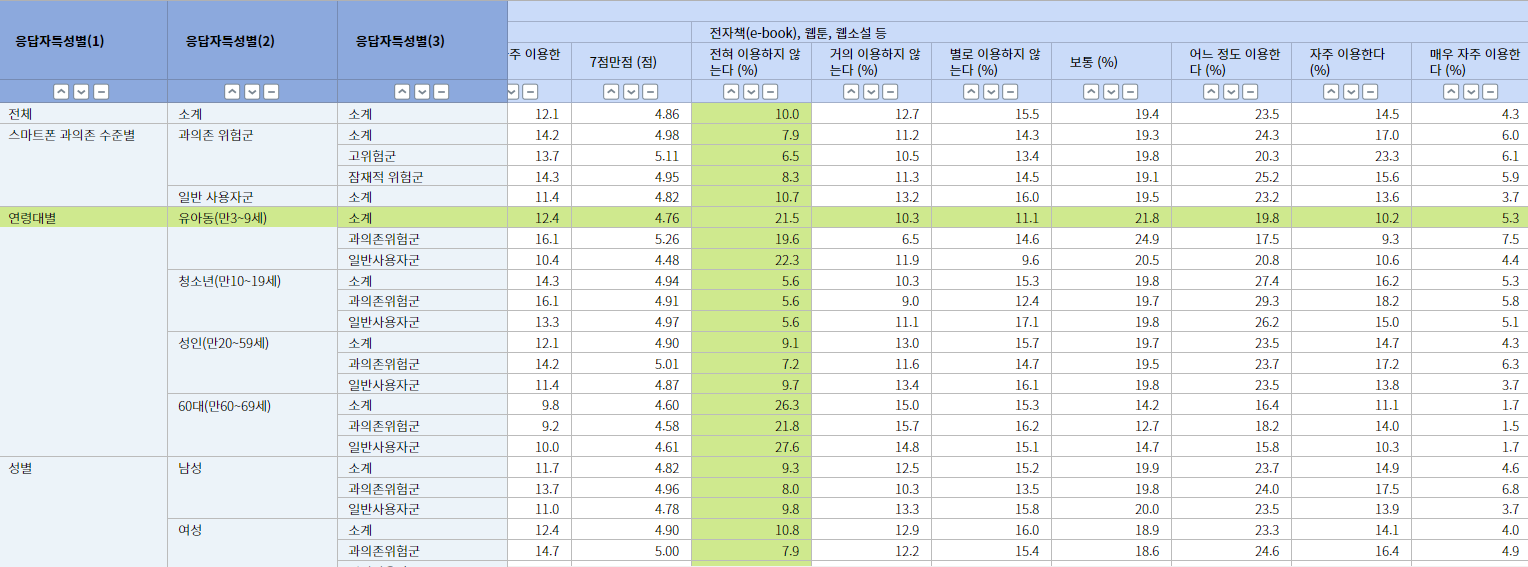

In [ ]:
이용정도 = ['전혀 이용하지 않는다', '거의 이용하지 않는다', '별로 이용하지 않는다', '보통', '어느 정도 이용한다', '자주 이용한다', '매우 자주 이용한다']
응답자특성 = ['유아동', '청소년', '성인', '60대', '남성', '여성']
유아동 = [21.5, 10.3, 11.1, 21.8, 19.8,	10.2, 5.3]
청소년 = [5.6, 10.3, 5.3, 19.8, 27.4, 16.2, 5.3]
성인 = [9.1, 13.0, 15.7, 19.7, 23.5, 14.7, 4.3]
육십대 = [26.3, 15.0, 15.3, 14.2, 16.4, 11.1, 1.7]
남성 = [9.3, 12.5, 15.2, 19.9, 23.7, 14.9, 4.6]
여성 = [10.8, 12.9, 16.0, 18.9, 23.3, 14.1, 4.0]
비율 = [유아동, 청소년, 성인, 육십대, 남성, 여성]

#dataframe으로 만들기
d1 = pd.DataFrame(비율, index=응답자특성, columns=이용정도)
d1 #확인용

,전혀 이용하지 않는다,거의 이용하지 않는다,별로 이용하지 않는다,보통,어느 정도 이용한다,자주 이용한다,매우 자주 이용한다
유아동,21.5,10.3,11.1,21.8,19.8,10.2,5.3
청소년,5.6,10.3,5.3,19.8,27.4,16.2,5.3
성인,9.1,13.0,15.7,19.7,23.5,14.7,4.3
60대,26.3,15.0,15.3,14.2,16.4,11.1,1.7
남성,9.3,12.5,15.2,19.9,23.7,14.9,4.6
여성,10.8,12.9,16.0,18.9,23.3,14.1,4.0


In [ ]:
d1['이용X'] = d1.loc[:, '전혀 이용하지 않는다':'별로 이용하지 않는다'].sum(axis=1)
d1['이용O'] = d1.loc[:, '어느 정도 이용한다':'매우 자주 이용한다'].sum(axis=1)

# 새로운 dataframe 만들기
d2 = d1[['이용X', '보통', '이용O']]
d2

,이용X,보통,이용O
유아동,42.9,21.8,35.3
청소년,21.2,19.8,48.9
성인,37.8,19.7,42.5
60대,56.6,14.2,29.2
남성,37.0,19.9,43.2
여성,39.7,18.9,41.4


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53584 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52768 missing from current font.
  font.set_

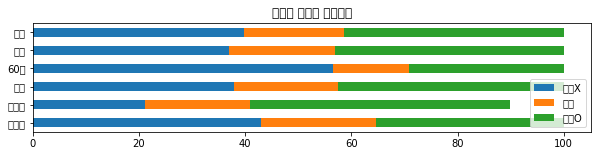

In [ ]:
# 응답자 특성에 따른 이용 정도 시각화
d2.plot(kind='barh', stacked = True, figsize=(10,2)) # 가로 막대 그래프
plt.title('주이용 콘텐츠 이용정도') # 그래프의 제목

plt.show()

### 2.2.1. 웹툰 분석

```
- 네이버 웹툰에서 [드라마원작] 키워드 검색: (https://comic.naver.com/search?m=webtoon&keyword=%EB%93%9C%EB%9D%BC%EB%A7%88&type=all) 

- 나무위키에서 [분류:웹툰 원작 드라마] 키워드 검색: (https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EC%9B%B9%ED%88%B0%20%EC%9B%90%EC%9E%91%20%EB%93%9C%EB%9D%BC%EB%A7%88)
```

[네이버 웹툰 사이트와 나무위키를 종합하여 검색]
원작이 네이버 사이트에 연재되었다고 표기된 웹툰 리스트(중복 제외): 총 72개 
(웹드라마 제외 시 59개)

웹툰 가운데 아직 방영되지 않은 작품들도 있고, 웹툰과 드라마의 제목이 다른 경우가 있어 '웹툰_리스트'와 '드라마_리스트'를 따로 설정함

In [ ]:
# 웹툰 리스트 정의
웹툰_리스트 = ['간 떨어지는 동거', '계룡선녀전', '한번 더 해요', '꽃가족', '내 ID는 강남미인', '내과 박원장', '냄새를 보는 소녀', '놓지마 정신줄', '닥터 프로스트', '멜로홀릭', '사장님을 잠금해제', '송곳', '싸우자 귀신아', '쌉니다 천리마마트', '아일랜드', '알고있지만', '약한 영웅', '어서와', '오렌지 마말레이드', '운빨로맨스', '은주의 방', '녹두전', '조선왕조실톡', '참치와 돌고래', '청춘 블라썸', '치즈인더트랩', '커넥트', '타인은 지옥이다', '가우스전자', '금수저', '내일', '동네변호사 조들호', '머니게임', '스위트홈', '안나라수마나라', '여신강림', '우월한 하루', '유미의 세포들', '지금 우리 학교는', '지옥', 'D.P 개의날', '마음의 소리', '만찢남녀', '무한동력', '백수세끼', '소녀의 세계', '손의 흔적', '썸남', '연애세포', '연애혁명', '오늘도 형제는 평화롭다', '우리 헤어졌어요', '질풍기획', '후유증', '고래별', '낮에 뜨는 달', '닭강정', '마음의 숙제', '방과 후 전쟁활동', '비질란테', '사냥개들', '살인자o난감', '언터쳐블', '오늘도 사랑스럽개', '우연일까', '운수오진날', '이두나!', '이제 곧 죽습니다', '정년이', '하이브', '마스크걸', '이번 생도 잘 부탁해']
웹툰_리스트.sort()
print(웹툰_리스트)

['D.P 개의날', '가우스전자', '간 떨어지는 동거', '계룡선녀전', '고래별', '금수저', '꽃가족', '낮에 뜨는 달', '내 ID는 강남미인', '내과 박원장', '내일', '냄새를 보는 소녀', '녹두전', '놓지마 정신줄', '닥터 프로스트', '닭강정', '동네변호사 조들호', '마스크걸', '마음의 소리', '마음의 숙제', '만찢남녀', '머니게임', '멜로홀릭', '무한동력', '방과 후 전쟁활동', '백수세끼', '비질란테', '사냥개들', '사장님을 잠금해제', '살인자o난감', '소녀의 세계', '손의 흔적', '송곳', '스위트홈', '싸우자 귀신아', '쌉니다 천리마마트', '썸남', '아일랜드', '안나라수마나라', '알고있지만', '약한 영웅', '어서와', '언터쳐블', '여신강림', '연애세포', '연애혁명', '오늘도 사랑스럽개', '오늘도 형제는 평화롭다', '오렌지 마말레이드', '우리 헤어졌어요', '우연일까', '우월한 하루', '운빨로맨스', '운수오진날', '유미의 세포들', '은주의 방', '이두나!', '이번 생도 잘 부탁해', '이제 곧 죽습니다', '정년이', '조선왕조실톡', '지금 우리 학교는', '지옥', '질풍기획', '참치와 돌고래', '청춘 블라썸', '치즈인더트랩', '커넥트', '타인은 지옥이다', '하이브', '한번 더 해요', '후유증']


In [ ]:
# 표 형식으로 보기 위해 dataframe 설정
webtoon1 = pd.DataFrame(index=웹툰_리스트)
webtoon1

NameError: ignored

#### 별점

In [ ]:
# 빈 리스트 설정 (추후 계산할 웹툰의 별점이 들어갈 리스트)
웹툰별점_리스트 = []

In [ ]:
# 정규식 (추후 사용 - 튜터님의 도움을 받음)
import re
pattern = re.compile('[0-9]\.[0-9][0-9]') # 별점의 형식이 *.**(소수점 둘째자리까지)이므로
rate = 'ddd' # 정상적으로 작동하는지 확인하고자
print(pattern.match(rate))

In [ ]:
# 별점 함수
def webtoon_rating(name):
    driver.get('https://comic.naver.com/')
    driver.find_element(By.CLASS_NAME, 'snb_search_text').send_keys(name) # 검색어 입력
    time.sleep(3)    
    
    xpath = '//*[@id="search_bar_button"]/span' # 검색 클릭
    driver.find_element(By.XPATH, value=xpath).click()
    time.sleep(3)  
    
    if (driver.find_element(By.CLASS_NAME, "resultList").text) != '검색 결과가 없습니다.':
        xpath = '//*[@id="content"]/div[2]/ul/li[1]/h5/a' # 제일 첫 번째 항목 클릭
        driver.find_element(By.XPATH, value=xpath).click()
        time.sleep(3)
        html=driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        strong_list = soup.find_all('strong', {"class": ""}) # strong 태그가 별점. 별점 모두 찾아서
        
        rate_list = []
        
        for strong in strong_list:
            if pattern.match(strong.text.strip()) != None:
                rate_list.append(strong.text.strip())
            
        
        for i in range(len(rate_list)):
            rate_list[i] = float(rate_list[i]) # 다 실수형으로 변환
        
        mean = sum(rate_list) / len(rate_list) # 평균 내기
        
        return mean

In [ ]:
# 별점 계산하는 코드.
for i in 웹툰_리스트:
    웹툰별점_리스트.append(webtoon_rating(i))
    
print(웹툰별점_리스트)

NameError: ignored

In [ ]:
# 계산한 별점을 dataframe에 추가하는 코드
webtoon1['별점'] = pd.Series(웹툰별점_리스트, index=웹툰_리스트)
webtoon1

In [ ]:
# 별점을 boxplot으로 시각화
sns.boxplot (x='별점', data=webtoon1)
plt.title('드라마로 만들어진 웹툰의 별점 boxplot')
plt.show()

별점평균 = webtoon1.mean()
print(f'별점 평균 : {별점평균}')

실사화된 웹툰들의 별점 평균은 9.89이며, 별점 9.9를 넘는 웹툰들도 상당히 많다는 것을 알 수 있다.

평균에서 크게 벗어나는 웹툰들(평균 9.4대)은 닭강정/여신강림이라고 볼 수 있는데, 상대적으로 낮은 평점에도 불구하고 그 왜 실사화가 됐을지를 추정해보면,

- 닭강정: 특이한 소재와 줄거리
[줄거리] 인턴 사원 ‘고백중’이 거래처에서 받은 기계를 꺼내놓은 사이, 사장의 딸 ‘최민아’가 기계를 신기해하며 안에 들어간다. 그 기계가 잠기면서 펑 터지고, 최민아는 닭강정으로 변해버리는데...

- 여신강림: 그림체와 작가 개인의 인기
[그림체] 작품이 연재가 될 당시 ‘여신강림’은 그 그림체도 유명해지기도 했었는데, 작가의 작화력에 대해 호평이 많다. 특히, 등장인물들의 외모가 모두 연예인에 버금가 큰 인기를 끌기도 했다. 
[작가 개인의 인기] ‘여신강림’을 그린 ‘야옹이’ 작가는, 웹툰의 주인공을 닮은 듯한 아름다운 외모로 sns상에서 큰 인기를 얻고 있다. 실제로 그녀는 145.2만 팔로워를 보유하고 있기도 하다.

=> 따라서 웹툰 실사화에는 웹툰에 별점을 높게 줄 만한 전형적인 요인들(탄탄한 스토리, 작화, 개인의 선호) 외에도 스토리의 독창성, 창의성이나 작가 개인의 인지도라는 변수도 영향을 줄 수 있음을 알 수 있다.

#### 장르

In [ ]:
# 빈 리스트 설정 (추후 계산할 웹툰의 장르가 들어갈 리스트)
웹툰장르_리스트 = []

In [ ]:
# 장르 함수
def webtoon_genre(name):
    global 웹툰장르_리스트
    driver.get('https://comic.naver.com/')
    driver.find_element(By.CLASS_NAME, 'snb_search_text').send_keys(name) # 검색어 입력
    time.sleep(3)    
    xpath = '//*[@id="search_bar_button"]/span' # 검색 클릭
    driver.find_element(By.XPATH, value=xpath).click()
    time.sleep(3)  
    if (driver.find_element(By.CLASS_NAME, "resultList").text) != '검색 결과가 없습니다.':
        xpath = '//*[@id="content"]/div[2]/ul/li[1]/h5/a' # 제일 첫 번째 항목 클릭
        driver.find_element(By.XPATH, value=xpath).click()
        time.sleep(3)  
        웹툰장르 = driver.find_elements(By.CLASS_NAME, "genre") # 장르 가져오기
        if len(웹툰장르) != 0:
            for i in range(len(웹툰장르)):
                gen_text= 웹툰장르[i].text
                웹툰장르_리스트.append(gen_text) # 리스트에 추가
    else:
        웹툰장르_리스트.append('None')

In [ ]:
# 웹툰장르_리스트가 만들어짐
for i in 웹툰_리스트:
    webtoon_genre(i)

In [ ]:
# 확인용
print(웹툰장르_리스트)

In [ ]:
# 웹툰장르_리스트에 있는 아이템들을 쪼개주기
genre = []
for a in 웹툰장르_리스트:
    a = a.split(', ')
    for b in a:
        genre.append(b)
print(genre)

In [ ]:
# 각 장르의 개수를 세기 위한 함수 (연습문제 코드 활용)
def pop_vote(data):
    result = dict()
    for each_data in data:
        if (each_data in result) == True:
            result[each_data] = result[each_data] +1
        else:
            result[each_data] = 1
    return result

dic_genre = pop_vote(genre)
print(dic_genre)

In [ ]:
# 시각화
# 형식 차원
print('스토리:', dic_genre['스토리'])
print('에피소드:', dic_genre['에피소드'])
print('옴니버스:', dic_genre['옴니버스'])
print()

# 내용 차원
print('로맨스:', dic_genre['로맨스'])
print('드라마', dic_genre['드라마'])
print('개그:', dic_genre['개그'])
print('감성:', dic_genre['감성'])
print('스릴러:', dic_genre['스릴러'])
print('액션:', dic_genre['액션'])
print('판타지:', dic_genre['판타지'])
print('일상:', dic_genre['일상'])

In [ ]:
# 형식 차원의 구분 코드
form_num = [59,9,4]
form_genre = ['스토리', '에피소드', '옴니버스']
form_column= ['웹툰의 수']
form=pd.DataFrame(form_num, index=form_genre, columns= form_column)

sorted_form=form.sort_values(by='웹툰의 수')
sorted_form

# 줄거리의 내용 구분
story_num = [20,23,10,1,13,3,1,1]
story_genre = ['로맨스','드라마','개그','감성','스릴러','액션','판타지','일상']
story_column= ['웹툰의 수']
story=pd.DataFrame(story_num, index=story_genre, columns= story_column)

sorted_story=story.sort_values(by='웹툰의 수')
sorted_story

# 시각화
sorted_form.plot(kind='barh', stacked = True) 
plt.title('드라마 실사화 웹툰의 장르 구분 (형식 차원)')
plt.show()

sorted_story.plot(kind='barh')
plt.title('드라마 실사화 웹툰의 장르 구분 (내용 차원)')
plt.show()

- 형식의 경우 스토리: 59/에피소드: 9/옴니버스: 4로 스토리가 압도적으로 많았다.
그 이유를 추측해보자면, 현재 상당수의 드라마는 스토리, 어떠한 문제(사건)가 시작되어 해결되는 구조를 따르는 경우가 많고, 정해진 시간(회차) 안에 압축적으로 서사를 풀어낼 수 있다는 드라마라는 영상매체의 특성상 매회 다른 사건들이 나열되는 에피소드나 옴니버스보다는 하나의 스토리를 가진 웹툰이 실사화되기에 적합해보인다. 가장 쉬운 방식으로 드라마화(化)할 수 있는 형식이 스토리로 보인다.

- 내용의 경우는 로맨스: 20/드라마 23/개그: 10/감성: 1/스릴러: 13/액션: 3/판타지: 1/일상: 1로 형식에 비해서는 비교적 고른 분포를 보인다고 할 수 있다. 드라마와 로맨스가 가장 큰 비중을 차지한다고 할 수 있는데, 이는 앞서 언급한 압축적으로 서사를 전달하기 좋은 드라마의 특성 때문이라고 할 수도 있지만, 한국 드라마 자체의 장르가 로맨스에 쏠려 있는 경향성을 보여주기도 한다. 2000년대부터 한국 드라마는 청춘 로맨스, 로맨스 스릴러, 로맨틱 코미디, 판타지 로맨스 등 다양한 장르가 결합된 '로맨스물' 작품들이 쏟아지기 시작했는데, 이러한 흐름에 맞춰 로맨스 및 드라마 웹툰들이 많이 드라마화 되고 있는 것으로 보인다.

### 2.2.2. 드라마 분석

In [ ]:
# 드라마 리스트 정의
드라마_리스트 = ['간 떨어지는 동거', '계룡선녀전', '고백부부', '꽃가족', '내 아이디는 강남미인', '내과 박원장', '냄새를 보는 소녀', '놓지마 정신줄', '닥터 프로스트', '멜로홀릭', '사장님을 잠금해제', '송곳', '싸우자 귀신아', '쌉니다 천리마마트', '아일랜드', '알고있지만', '약한영웅 Class 1', '어서와', '오렌지 마말레이드', '운빨로맨스', '은주의 방', '녹두전', '조선왕조실톡', '참치와 돌고래', '청춘 블라썸', '치즈인더트랩', '커넥트', '타인은 지옥이다', '가우스전자', '금수저', '내일', '동네변호사 조들호 1', '머니게임', '스위트홈', '안나라수마나라', '여신강림', '우월한 하루', '유미의 세포들 1', '지금 우리 학교는', '지옥', 'D.P.']
드라마_리스트.sort()

#### 시청률

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

url = "http://naver.com" 
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")

options.headless = True

driver = webdriver.Chrome("/usr/bin/chromedriver", options=options)

시청률_리스트={}
기준=['시청률']
for each in 드라마_리스트:
    driver.get(url)
    elem_search = driver.find_element(By.ID, 'query')
    elem_search.send_keys(each, '드라마')
    xpath = '//*[@id="search_btn"]' #검색버튼 xpath
    driver.find_element(By.XPATH, value=xpath).click()
    driver.implicitly_wait(3)
    html=driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    b=soup.find_all('em', class_="value") # 각 화면에서 시청률 수치 크롤링
    for i in range(len(b)):
        c=b[i].get_text()
        if c==None:
            시청률_리스트[each]=np.NaN
        else:
            c = c[:-1] # 실수형으로 변환하기 위해 "%" 제거
            c = float(c) # 실수형으로 변환 -> 추후 시청률 대소비교에 필요
            시청률_리스트[each]=c #시청률 결과가 검색될 경우 딕셔너리 형태로 저장

df1=pd.DataFrame(시청률_리스트, index=기준) #시청률 리스트를 데이터프레임 형태로
df1=df1.T
df1

#### 방송사

In [ ]:
방송사_리스트 = ['tvN', 'tvN', 'KBS2', 'MBC', 'JTBC', 'tvN', 'MBC', 'SBS', 'KBS2', 'OCN', 'KBS2', 'tvN', 'OCN', 'ENA', 'JTBC', 'tvN', 'tvN', 'JTBC', 'KBS2', 'tvN', 'KBS2', 'OCN', 'MBC', 'tvN', 'KBS2', 'tvN', 'OCN']
df1.insert(1,"방송사", 방송사_리스트, True)
df1 # 확인용

In [ ]:
# 웹드라마(시청률 검색되지 않는 드라마)
extra_list = ['D.P', '가우스전자','놓지마 정신줄','사장님을 잠금해제','아일랜드','안나라수마나라','약한 영웅 Class1','은주의 방','지금 우리 학교는','지옥','청춘 블라썸','커넥트','툰드라쇼 꽃가족','툰드라쇼 조선왕조실톡']
extra_broadcast = ['넷플릭스', 'Seezn','JTBC', 'ENA', '티빙', '넷플릭스', '웨이브', 'Olive', '넷플릭스', '넷플릭스', '웨이브', '디즈니플러스', 'MBC every1', 'MBC every1' ]
# extra_broadcast: 웹드라마 방송사 이름
extra_rating = ['넷플릭스 국내 1위', 'NaN', 'NaN','NaN','NaN','넷플릭스 국내 7위', '국내 OTT화제성 4위', 'NaN', '넷플릭스 국내 1위', '넷플릭스 국내 1위', 'NaN', '디즈니 플러스 국내 1위', 'NaN', 'NaN' ]
#extra_rating: 웹드라마의 성적. NaN은 큰 흥행 실적이 없는 것

In [ ]:
# 웹드라마 dataframe 만들기
s1=pd.Series(extra_rating, index=extra_list)
s2=pd.Series(extra_broadcast, index=extra_list)

df2=pd.DataFrame()
df2['비고']=s1 #추후 extra_rating으로 채울 예정
df2['방송사']=s2
df2  # 확인용

In [ ]:
# 새로운 전체 dataframe 만들기
new_df = df1.append(df2, ignore_index = False) # df1에 df2를 추가하여, 시청률 자료가 없는 웹드라마까지 모두 포함

new_df=new_df.fillna(0) # 빈칸이 있을 경우 모두 0으로 채움
new_df # 확인용

In [ ]:
# 채널명을 방송사 유형으로 변경
방송사_mapping={'KBS':'지상파', 'KBS2':'지상파', 'KBS1':'지상파', 'MBC':'지상파', 'SBS':'지상파', 'tvN':'종편', 'OCN':'종편', 'JTBC':'종편', 'Olive':'종편', 'MBC every1': '종편', 'ENA':'종편', '넷플릭스':'OTT', 'Seezn':'OTT', '티빙':'OTT', '웨이브':'OTT', '디즈니플러스':'OTT'}
new_df['방송사']=new_df['방송사'].map(방송사_mapping)
new_df # 확인용

#### 흥행(성공/실패)

In [ ]:
new_df['흥행'] = 0 # 성공작/비성공작을 구분하는 column
new_df # 확인용

In [ ]:
new_df.loc [ ( new_df['방송사'] == '지상파' ) & ( new_df['시청률'] > 10) , '흥행'] = '성공'
new_df.loc [ ( new_df['방송사'] == '지상파' ) & ( new_df['시청률'] <= 10) , '흥행'] = '실패'
# 지상파의 경우 시청률 10% 초과의 드라마를 흥행작으로 설정
new_df # 확인용

In [ ]:
new_df.loc [ ( new_df['방송사'] == '종편'   ) & ( new_df['시청률'] > 5) , '흥행'] = '성공'
new_df.loc [ ( new_df['방송사'] == '종편'   ) & ( new_df['시청률'] <= 5) , '흥행'] = '실패'
# 종편의 경우 시청률 5% 초과의 드라마를 흥행작으로 설정
new_df # 확인용

In [ ]:
new_df.loc [ ( new_df['방송사'] == 'OTT'   ) & ( new_df['비고']=='NaN') , '흥행'] = '실패'
new_df.loc [ ( new_df['방송사'] == 'OTT'   ) & ( new_df['비고']==0) , '흥행'] = '실패'
new_df.loc [ ( new_df['방송사'] == 'OTT'   ) & ( new_df['비고']!=0) & (new_df['비고']!='NaN') , '흥행'] = '성공'
# OTT의 경우 화제성이나 국내 랭킹 10위 안에 들어가면 흥행작으로 설정
new_df # 확인용

In [ ]:
# 성공작 행추출
final_df=new_df[new_df['흥행'].isin(['성공'])]
final_df # 확인용

In [ ]:
success_index=final_df.index.to_list()
print(success_index) # 성공작들의 리스트

#### 시각화

In [ ]:
# 성공작들의 별점
성공작_별점 = [9.96, 9.96, 9.89, 9.94, 9.91, 9.90, 9.95, 9.84, 9.95, 9.72, 9.73, 9.93, 9.78]
sns.boxplot(data=성공작_별점)
plt.title('웹툰 원작 드라마 중 성공작들의 별점 boxplot')
plt.show()

sns.boxplot (y='별점', data=webtoon1)
plt.title('드라마로 만들어진 웹툰의 별점 boxplot')
plt.show()

드라마로 만들어진 웹툰 전체와 그 가운데 성공작들의 boxplot을 비교해보았다. 확실히 성공작들의 별점이 평균적으로 훨씬 높은 것으로 보인다.

In [ ]:
# 성곡작들의 방송사 종류
sns.countplot(x='방송사', data=final_df)
plt.title('흥행한 웹툰 원작 드라마가 방영된 채널 유형')
plt.show()

웹툰 원작 드라마가 성공한 작품들을 살펴보았을 때 OTT 제작이 가장 많았다. 장르와 소재의 제약을 뛰어넘는 신선함이 무기인 웹툰이 지상파에서 드라마로 방영될 경우 PPL이나 비교적 엄격한 방송 규정 등으로 인해 그 신선함이 다소 떨어질 수밖에 없어 흥행이 상대적으로 어렵지 않을까 하는 생각이 들었다.

## 3.소감

작업을 하면서 어려웠던 점은 크게 세 가지였다.

첫째, 자료(시청률, 제작사)가 한곳에 모여있거나 같은 형태로 나타나 있지 않아서 크롤링하는 데에 어려움이 있었다. 여러 사이트에서 정보를 가져와야 하는 상황이어서 현재까지 배운 크롤링의 기술로는 쉽지 않았다. 따라서 일부 자료의 경우 결국 직접 리스트로 만들어 작업을 진행하기도 하였다.

둘째, OTT나 다시 보기 서비스의 발달로 인해 시청률과 같은 단순 지표로 성공작/비 성공작을 판단하기에 어려움이 있었다. 웹툰 실사화 드라마의 흥행 여부를 판단하기 위해서는 시청률이나 조회수와 같은 수치적 데이터를 이용해야 하는데, OTT의 경우 정확한 조회수의 데이터를 제공하지 않아서 흥행 여부를 판단하는 데에 있어 어려움이 있었다. 결국 논의 끝에 국내 10위 랭킹권 안에 드는 작품들을 흥행작으로 선정하며 기준을 새로 잡아야 했다.

마지막으로는, 표본(실사화된 작품)이 신뢰성을 얻을 만큼 많지 않아서, 데이터가 다소 단순하게 나온 측면이 있는 것 같다. 아무래도 웹툰 IP를 이용한 실사화 제작 작업이 근래부터 성장세를 타기 시작한 작업인 만큼, 수집할 수 있는 데이터가 한정적이었다. 하지만 앞으로도 많은 웹툰의 실사화 작품들이 방영 예정되어있는 만큼, 추가 연구를 진행할 시 유의미한 결과를 도출할 수 있을 것 같다.

어려운 점이 없지는 않았지만 팀원 모두가 흥미를 느꼈던 주제이니만큼, 주제 선정이나 파트 분담의 과정 및 협업의 과정이 순조롭게 흘러갔다. 작업을 하면서 웹 크롤링 능력이 크게 성장한 것을 느꼈고, 덤으로 몰랐던 웹툰 실사화 작품들을 새로 알게 되니 작업을 하면서도 즐거웠다. 한 달가량의 짧은 시간 동안 코딩을 속성으로 배우고, 이렇게 실전 응용까지 가능하다는 것이 신기하다.

이상입니다. 감사합니다. 